In [1]:
%matplotlib inline 
import numpy as np, pandas as pd,os
import matplotlib.pyplot as plt
import time

In [2]:
pd.__version__

'0.20.3'

In [56]:
df = pd.read_csv("cpu.csv",sep=",")
df.head()

,machine_id,date,timestamp,cpu_ghz,cpu_usage,idle,ip,total
0,t-657740490-UserCluster1-sysadmin,2017/8/8,2017-08-08 00:00:00+0000,1.200,0.087799,9278,192.168.41.16,10171
1,t-657740490-UserCluster1-sysadmin,2017/8/8,2017-08-08 00:00:02+0000,1.278,0.091266,9260,192.168.41.16,10190
2,t-657740490-UserCluster1-sysadmin,2017/8/8,2017-08-08 00:00:04+0000,1.224,0.092574,9263,192.168.41.16,10208
3,t-657740490-UserCluster1-sysadmin,2017/8/8,2017-08-08 00:00:06+0000,1.200,0.093147,9210,192.168.41.16,10156
4,t-657740490-UserCluster1-sysadmin,2017/8/8,2017-08-08 00:00:09+0000,1.200,0.089702,9255,192.168.41.16,10167


In [57]:
#drop unused data
df = df.drop(df[["date","ip"]],axis=1)

,machine_id,timestamp,cpu_ghz,cpu_usage,idle,total
0,t-657740490-UserCluster1-sysadmin,2017-08-08 00:00:00+0000,1.200,0.087799,9278,10171
1,t-657740490-UserCluster1-sysadmin,2017-08-08 00:00:02+0000,1.278,0.091266,9260,10190
2,t-657740490-UserCluster1-sysadmin,2017-08-08 00:00:04+0000,1.224,0.092574,9263,10208
3,t-657740490-UserCluster1-sysadmin,2017-08-08 00:00:06+0000,1.200,0.093147,9210,10156
4,t-657740490-UserCluster1-sysadmin,2017-08-08 00:00:09+0000,1.200,0.089702,9255,10167


In [58]:
#set datetime for index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamps"] = df["timestamp"]
df = df.set_index(df["timestamps"])
df = df.drop(df[["timestamps"]],axis=1)
df = df.sort_index()

,machine_id,timestamp,cpu_ghz,cpu_usage,idle,total
timestamps,,,,,,
2017-08-04 07:03:49,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:49,1.224,0.011516,9957,10073
2017-08-04 07:03:51,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:51,1.200,0.007435,10013,10088
2017-08-04 07:03:53,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:53,1.200,0.006037,10044,10105
2017-08-04 07:03:56,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:56,1.200,0.005645,10041,10098
2017-08-04 07:03:58,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:58,1.237,0.005052,10045,10096


In [59]:
#choice datatime
start_datetime = "2017-08-04 07:08:00"
end_datetime =  "2017-08-07 02:48:00"
mask = (df['timestamp'] > start_datetime) & (df['timestamp'] <= end_datetime)

df= df.loc[mask]
df.head()

,machine_id,timestamp,cpu_ghz,cpu_usage,idle,total
timestamps,,,,,,
2017-08-04 07:08:01,z-323389049-UserCluster1-sysadmin,2017-08-04 07:08:01,2.499,0.037248,9796,10175
2017-08-04 07:08:01,a-957043145-UserCluster1-sysadmin,2017-08-04 07:08:01,2.200,0.128606,4289,4922
2017-08-04 07:08:01,i-325376172-UserCluster1-sysadmin,2017-08-04 07:08:01,1.199,0.028583,9958,10251
2017-08-04 07:08:01,t-657740490-UserCluster1-sysadmin,2017-08-04 07:08:01,1.259,0.091177,9250,10178
2017-08-04 07:08:02,b-956223090-UserCluster1-sysadmin,2017-08-04 07:08:02,2.200,0.226827,3862,4995


In [60]:
#get first string of machine_id
def machine_id_sep(x):
    return x[0][0]

df["machine_id"] = df["machine_id"].apply(machine_id_sep)
df.head()

,machine_id,timestamp,cpu_ghz,cpu_usage,idle,total
timestamps,,,,,,
2017-08-04 07:08:01,z,2017-08-04 07:08:01,2.499,0.037248,9796,10175
2017-08-04 07:08:01,a,2017-08-04 07:08:01,2.200,0.128606,4289,4922
2017-08-04 07:08:01,i,2017-08-04 07:08:01,1.199,0.028583,9958,10251
2017-08-04 07:08:01,t,2017-08-04 07:08:01,1.259,0.091177,9250,10178
2017-08-04 07:08:02,b,2017-08-04 07:08:02,2.200,0.226827,3862,4995


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 691293 entries, 2017-08-04 07:08:01 to 2017-08-07 02:48:00
Data columns (total 6 columns):
machine_id    691293 non-null object
timestamp     691293 non-null datetime64[ns]
cpu_ghz       691293 non-null float64
cpu_usage     691293 non-null float64
idle          691293 non-null int64
total         691293 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 36.9+ MB


In [62]:
def group_by_id(df):
    df = df
    total_id = df["machine_id"].unique()
    total_id_len = len(total_id)
    df = df.groupby("machine_id")
    machine_dict = {}
    for i in total_id:
        machine_dict[i] = df.get_group(str(i))
    return machine_dict

machine_dict_c = group_by_id(df)

In [63]:
def resample_data_by_setting_time(machine_dict,resample_time):
    df = {}
    for i in machine_dict:
        df_m = machine_dict[i]
        df_m = df_m.resample(resample_time)
        df[i] = df_m
    return df
resample_data_mark_down_your_time_scale = resample_data_by_setting_time(machine_dict_c, "1min")

In [64]:
df = resample_data_mark_down_your_time_scale
def get_all_information(df_dict , change_col_name=0):
    processing_dict = {}
    df = df_dict
    for i in df.keys():
        data = df[i].agg([np.sum, np.mean, np.std, np.max, np.min])        
        if change_col_name == 0 :
            data.columns = ["_".join(x) for x in data.columns.ravel()]
        processing_dict[i] = data
    return processing_dict

information_dict_c = get_all_information(df)
information_dict_1_c = get_all_information(df,1)


In [73]:
information_dict_c["a"].head(2)

,cpu_ghz_sum,cpu_ghz_mean,cpu_ghz_std,cpu_ghz_amax,cpu_ghz_amin,cpu_usage_sum,cpu_usage_mean,cpu_usage_std,cpu_usage_amax,cpu_usage_amin,idle_sum,idle_mean,idle_std,idle_amax,idle_amin,total_sum,total_mean,total_std,total_amax,total_amin
timestamps,,,,,,,,,,,,,,,,,,,,
2017-08-04 07:08:00,60.484,2.085655,0.228038,2.200,1.200,2.592132,0.089384,0.039618,0.207766,0.051945,131129,4521.689655,191.352163,4727,3958,144010,4965.862069,24.849151,5004,4922
2017-08-04 07:09:00,55.248,1.973143,0.253292,2.201,1.395,0.545328,0.019476,0.018195,0.108887,0.006188,137274,4902.642857,92.280255,4979,4452,140000,5000.000000,4.578533,5010,4993


In [74]:
information_dict_1_c["a"].head(3)

cpu_ghz                                   cpu_usage  \
                        sum      mean       std   amax   amin       sum   
timestamps                                                                
2017-08-04 07:08:00  60.484  2.085655  0.228038  2.200  1.200  2.592132   
2017-08-04 07:09:00  55.248  1.973143  0.253292  2.201  1.395  0.545328   
2017-08-04 07:10:00  54.332  1.873517  0.303530  2.200  1.286  0.452960   

                                                               idle  \
                         mean       std      amax      amin     sum   
timestamps                                                            
2017-08-04 07:08:00  0.089384  0.039618  0.207766  0.051945  131129   
2017-08-04 07:09:00  0.019476  0.018195  0.108887  0.006188  137274   
2017-08-04 07:10:00  0.015619  0.005951  0.030164  0.005802  142815   

                                                           total               \
                            mean         std  amax  amin     sum         mean   
timestamps                                                                      
2017-08-04 07:08:00  4521.689655  191.352163  4727  3958  144010  4965.862069   
2017-08-04 07:09:00  4902.642857   92.280255  4979  4452  140000  5000.000000   
2017-08-04 07:10:00  4924.655172   35.297993  5022  4855  145082  5002.827586   

                                            
                           std  amax  amin  
timestamps                                  
2017-08-04 07:08:00  24.849151  5004  4922  
2017-08-04 07:09:00   4.578533  5010  4993  
2017-08-04 07:10:00  26.623122  5139  4989

In [19]:
df_m = pd.read_csv("memory.csv",sep=",",header=None)
df_m.head()

,0,1,2,3,4,5,6
0,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:00+0000,52378.75000,192.168.41.16,0.185554,64312.08594
1,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:02+0000,52374.03516,192.168.41.16,0.185627,64312.08594
2,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:04+0000,52374.65625,192.168.41.16,0.185617,64312.08594
3,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:06+0000,52373.81250,192.168.41.16,0.185630,64312.08594
4,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:09+0000,52373.32422,192.168.41.16,0.185638,64312.08594


In [20]:
df_m.columns=["machine_id","date","timestamp","free_mb","ip","mem_usage","total_mb"]
df_m.head(2)

,machine_id,date,timestamp,free_mb,ip,mem_usage,total_mb
0,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:00+0000,52378.75000,192.168.41.16,0.185554,64312.08594
1,t-657740490-UserCluster1-sysadmin,2017-08-08,2017-08-08 00:00:02+0000,52374.03516,192.168.41.16,0.185627,64312.08594


In [21]:
#drop unused data
df_m = df_m.drop(df_m[["date","ip"]],axis=1)
df_m.head()
#set datetime for index
df_m["timestamp"] = pd.to_datetime(df_m["timestamp"])
df_m["timestamps"] = df_m["timestamp"]
df_m = df_m.set_index(df_m["timestamps"])
df_m = df_m.drop(df_m[["timestamps"]],axis=1)
df_m = df_m.sort_index()
df_m.head()

,machine_id,timestamp,free_mb,mem_usage,total_mb
timestamps,,,,,
2017-08-04 07:03:47,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:47,121930.0,0.052323,128660.0
2017-08-04 07:03:49,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:49,121910.0,0.052441,128660.0
2017-08-04 07:03:51,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:51,121910.0,0.052436,128660.0
2017-08-04 07:03:53,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:53,121910.0,0.052432,128660.0
2017-08-04 07:03:56,i-325376172-UserCluster1-sysadmin,2017-08-04 07:03:56,121910.0,0.052468,128660.0


In [22]:
#choice datatime
start_datetime = "2017-08-04 07:08:00"
end_datetime =  "2017-08-07 02:48:00"
mask = (df_m['timestamp'] > start_datetime) & (df_m['timestamp'] <= end_datetime)

df_m= df_m.loc[mask]
df_m.head()

,machine_id,timestamp,free_mb,mem_usage,total_mb
timestamps,,,,,
2017-08-04 07:08:01,a-957043145-UserCluster1-sysadmin,2017-08-04 07:08:01,56116.37500,0.127481,64315.35156
2017-08-04 07:08:01,i-325376172-UserCluster1-sysadmin,2017-08-04 07:08:01,120820.00000,0.060936,128660.00000
2017-08-04 07:08:01,t-657740490-UserCluster1-sysadmin,2017-08-04 07:08:01,52388.05859,0.185409,64312.08594
2017-08-04 07:08:01,z-323389049-UserCluster1-sysadmin,2017-08-04 07:08:01,124900.00000,0.029227,128660.00000
2017-08-04 07:08:02,b-956223090-UserCluster1-sysadmin,2017-08-04 07:08:02,35559.58203,0.447105,64315.27344


In [23]:
#get first string of machine_id
def machine_id_sep(x):
    return x[0][0]

df_m["machine_id"] = df_m["machine_id"].apply(machine_id_sep)
df_m.head()

,machine_id,timestamp,free_mb,mem_usage,total_mb
timestamps,,,,,
2017-08-04 07:08:01,a,2017-08-04 07:08:01,56116.37500,0.127481,64315.35156
2017-08-04 07:08:01,i,2017-08-04 07:08:01,120820.00000,0.060936,128660.00000
2017-08-04 07:08:01,t,2017-08-04 07:08:01,52388.05859,0.185409,64312.08594
2017-08-04 07:08:01,z,2017-08-04 07:08:01,124900.00000,0.029227,128660.00000
2017-08-04 07:08:02,b,2017-08-04 07:08:02,35559.58203,0.447105,64315.27344


In [39]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 691294 entries, 2017-08-04 07:08:01 to 2017-08-07 02:48:00
Data columns (total 5 columns):
machine_id    691294 non-null object
timestamp     691294 non-null datetime64[ns]
free_mb       691294 non-null float64
mem_usage     691294 non-null float64
total_mb      691294 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 31.6+ MB


In [28]:
def group_by_id(df):
    df = df
    total_id = df["machine_id"].unique()
    total_id_len = len(total_id)
    df = df.groupby("machine_id")
    machine_dict = {}
    for i in total_id:
        machine_dict[i] = df.get_group(str(i))
    return machine_dict

machine_dict_m = group_by_id(df_m)

In [41]:
def resample_data_by_setting_time(machine_dict,resample_time):
    df = {}
    for i in machine_dict:
        df_m = machine_dict[i]
        df_m = df_m.resample(resample_time)
        df[i] = df_m
    return df
resample_m_1m = resample_data_by_setting_time(machine_dict_m, "1min")

In [44]:
def get_all_information(df_dict , change_col_name=0):
    processing_dict = {}
    df = df_dict
    for i in df.keys():
        data = df[i].agg([np.sum, np.mean, np.std, np.max, np.min])        
        if change_col_name == 0 :
            data.columns = ["_".join(x) for x in data.columns.ravel()]
        processing_dict[i] = data
    return processing_dict

information_dict_m = get_all_information(resample_m_1m)
information_dict_1_m = get_all_information(resample_m_1m,1)


In [78]:
combine_dict = {}
for i in information_dict_m.keys():
    df1 = information_dict_1_c[i]
    df2 = information_dict_1_m[i]
    combine_dict[i] = pd.concat([df1, df2], axis=1)

In [83]:
combine_dict["a"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4060 entries, 2017-08-04 07:08:00 to 2017-08-07 02:47:00
Freq: T
Data columns (total 35 columns):
(cpu_ghz, sum)       4060 non-null float64
(cpu_ghz, mean)      4060 non-null float64
(cpu_ghz, std)       4060 non-null float64
(cpu_ghz, amax)      4060 non-null float64
(cpu_ghz, amin)      4060 non-null float64
(cpu_usage, sum)     4060 non-null float64
(cpu_usage, mean)    4060 non-null float64
(cpu_usage, std)     4060 non-null float64
(cpu_usage, amax)    4060 non-null float64
(cpu_usage, amin)    4060 non-null float64
(idle, sum)          4060 non-null int64
(idle, mean)         4060 non-null float64
(idle, std)          4060 non-null float64
(idle, amax)         4060 non-null int64
(idle, amin)         4060 non-null int64
(total, sum)         4060 non-null int64
(total, mean)        4060 non-null float64
(total, std)         4060 non-null float64
(total, amax)        4060 non-null int64
(total, amin)        4060 non-null int64
(

In [85]:
%matplotlib inline 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [86]:
minutes = mdates.MinuteLocator()

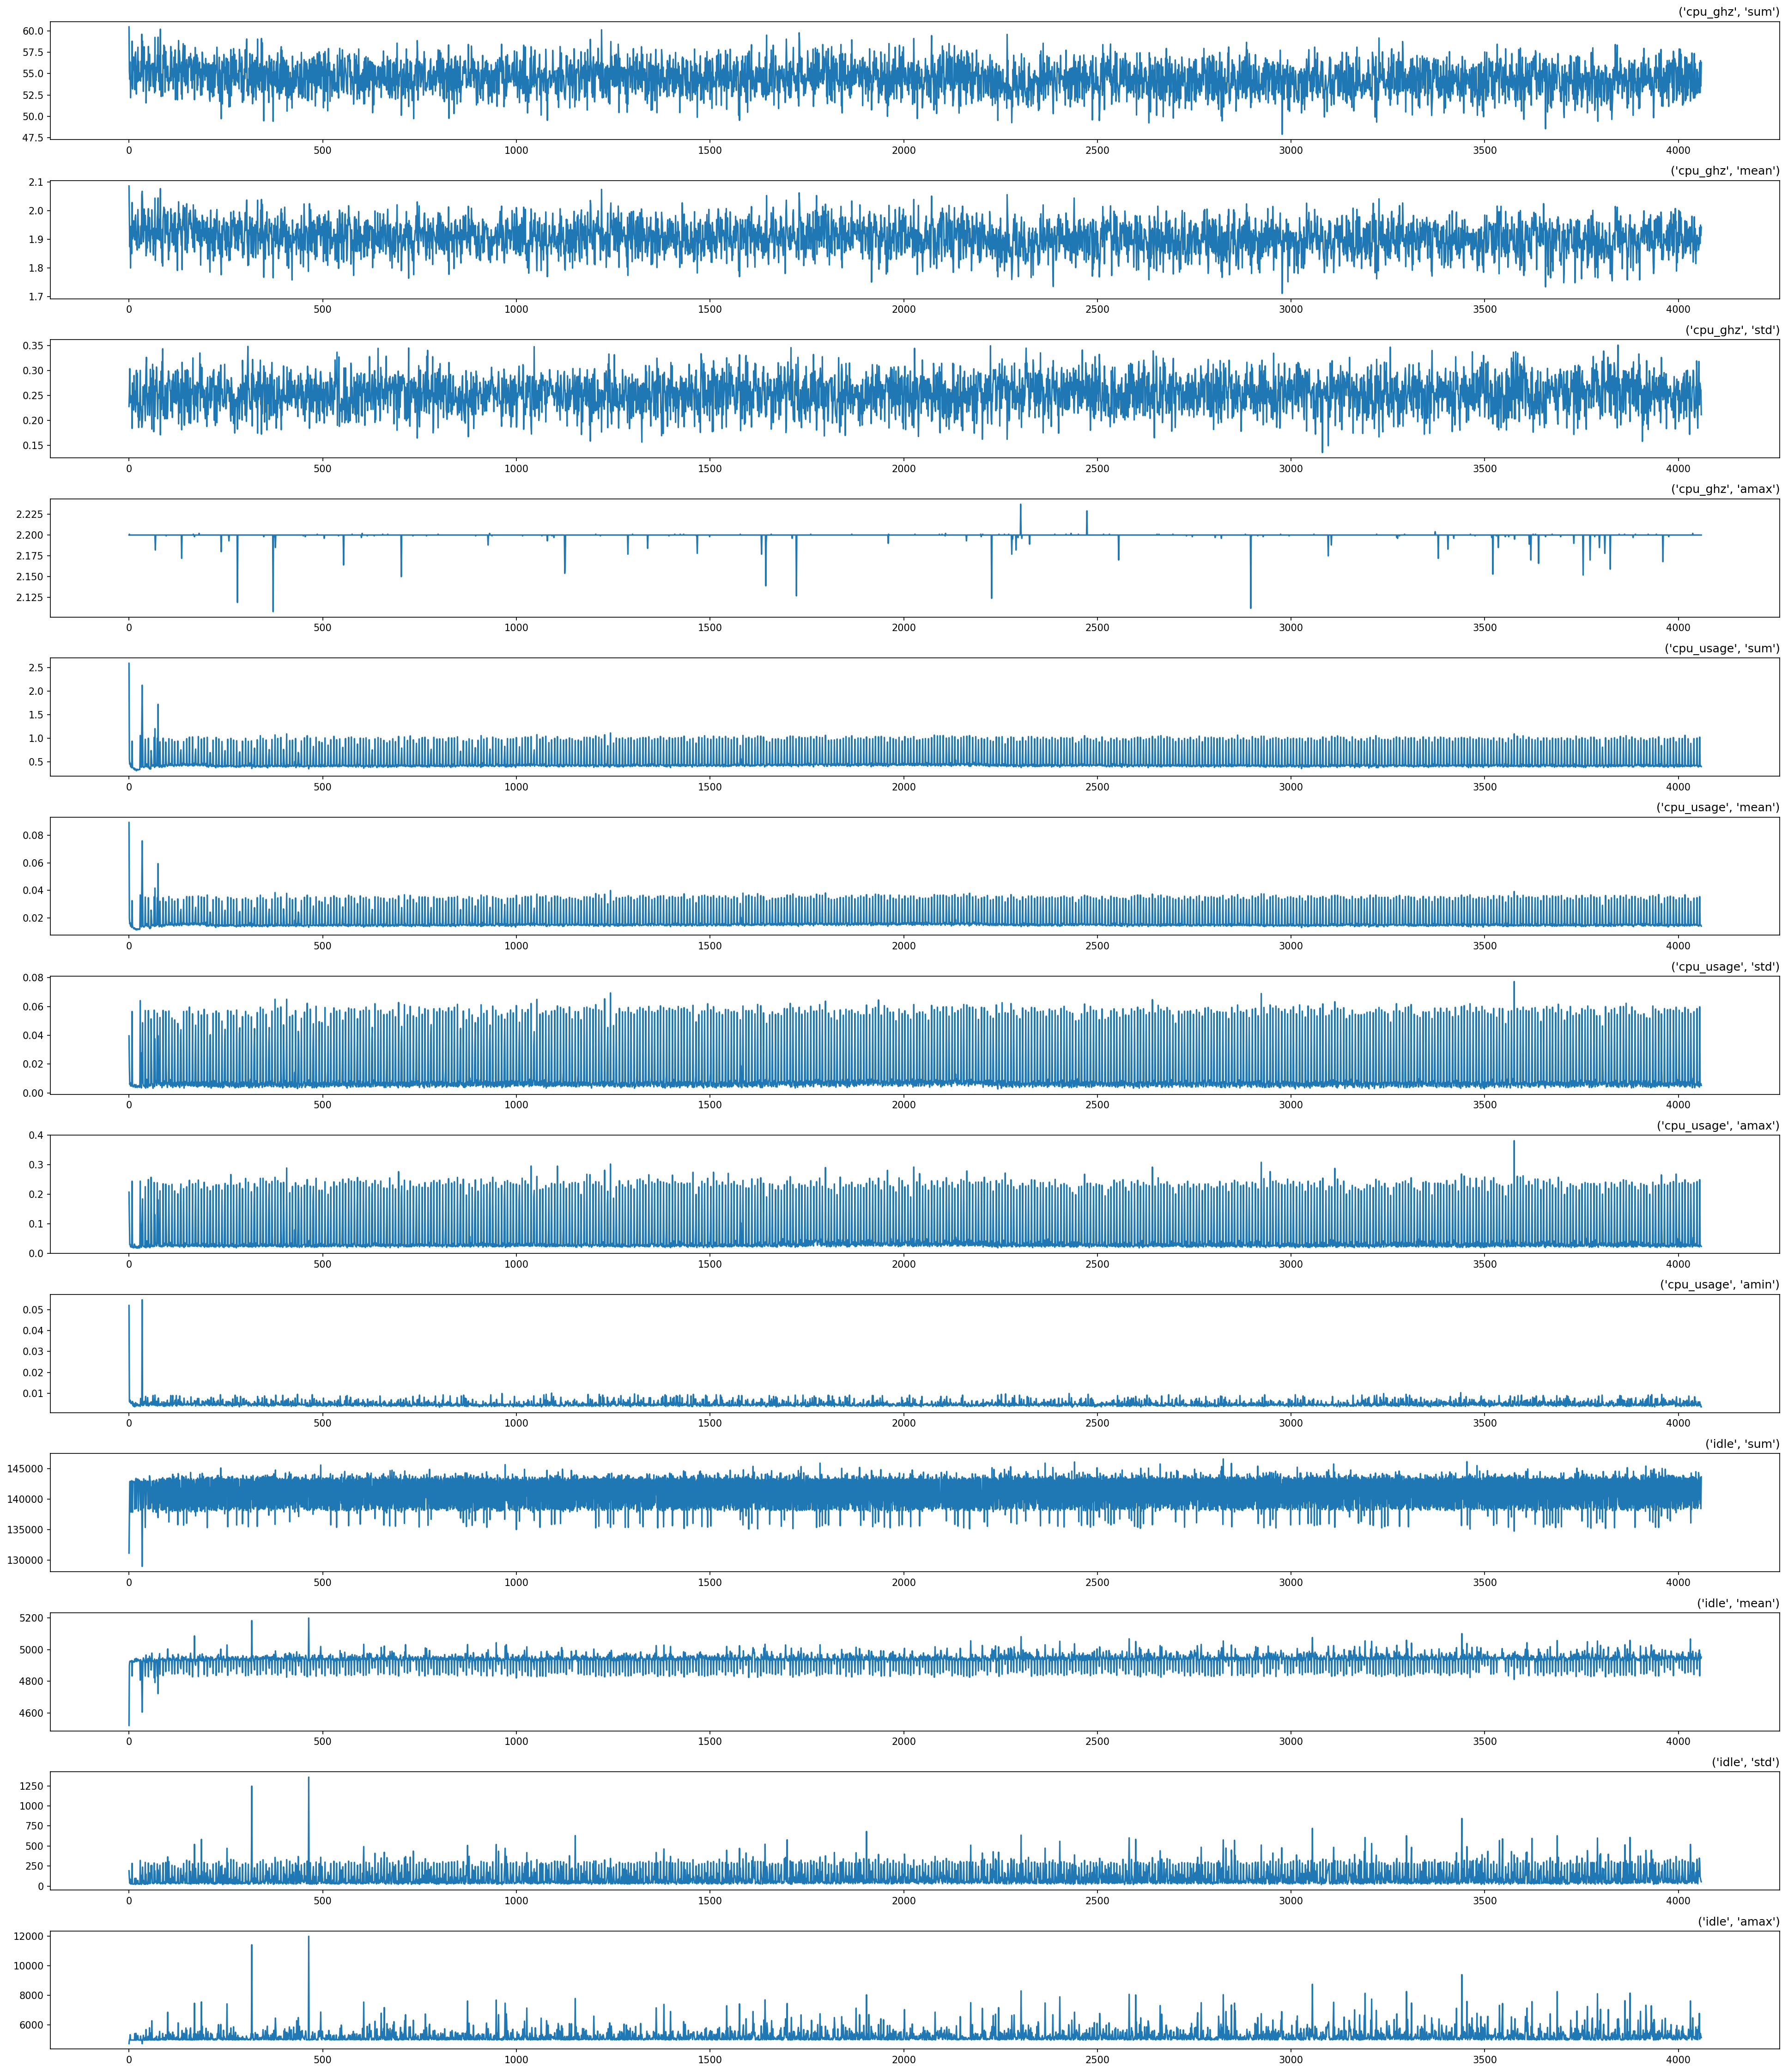

In [117]:
dataset = combine_dict["a"]
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
i = 1
# plot each column
plt.figure(figsize=(26, 30), dpi= 150, facecolor='w', edgecolor='k')

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.tight_layout()
    plt.plot(values[:, group])
    plt.title(combine_dict["a"].columns[group], y=1, loc='right')
    i += 1
plt.show()

SyntaxError: invalid syntax (<ipython-input-96-237a6af59cde>, line 1)